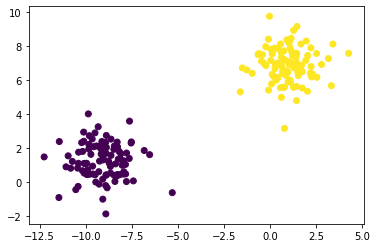

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Vamos criar 2 blobs com 200 samples e 2 features (2 dimensões) e 2 centros.
blobs = make_blobs(n_samples=200, n_features=2, centers=2)

# Em seguida, vamos plotar os dados gerados para visualização.
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

In [ ]:
class Perceptron(object):
    """
    Um perceptron simples com componentes simples.
    """
    
    def __init__(self, learning_rate=0.01, epochs=50, verbose=False):
        """
        Inicializa o perceptron com os valores de
        learning rate (taxa de aprendizado), epochs e um
        parametro de verbose, sinalizando que queremos ver os detalhes
        do funcionamento.
        """
        self.verbose = verbose
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        if(self.verbose):
            print("[>] Perceptron parameters:\n- learning rate: {}\n- # epochs: {}".format(
                self.learning_rate,
                self.epochs
            ))
    
    def _sum(self, X):
        """
        O processo de sum vai multiplicar o input pelo peso.
        """
        dp = np.dot(X, self._weights) + self._bias
        
        if(self.verbose):
            print("[!] Aggregation ({} and {}) + weight {} = {}".format(
                X,
                self._weights,
                self._bias,
                dp
            ))
        return dp
    
    def _activation(self, value):
        """
        Como função de ativação, escolhi a função degrau.
        Outras funções são bem comuns, mas o ganho entre elas
        faz com que a degrau seja uma das com melhor custo-benefício.
        """
        return np.where(value >= 0.0, 1, -1)

    def fit(self, X, y):
        """
        Vamos começar com os pesos como um array
        numpy aleatório, já que não temos pistas sobre
        quais são os pesos corretos.
        """
        self._bias = np.random.uniform(-1, 1)
        self._weights = np.random.uniform(-1, 1, (X.shape[1]))
        self._errors = []
        
        if(self.verbose):
            print("[>>] Starting training routine:\n- initial weights: {}\n- initial errors: {}".format(
                self._weights,
                self._errors
            ))
            print("- train set (X): {}\n- train set (y): {}\n---".format(
                X,
                y
            ))

        # Iterando o numero de epochs...
        for epoch_number in range(self.epochs):
            errors = 0
            
            if(self.verbose):
                print("[>>] Entering epoch {}\n- weights: {}\n- errors: {}".format(
                    epoch_number,
                    self._weights,
                    self._errors
                ))
            
            for xi, target in zip(X, y):
                if(self.verbose):
                    print("[!] Learning xi = {} (target {})".format(xi, target))
                
                output = self.predict(xi)
                update = self.learning_rate * (target - output)
                
                if(self.verbose):
                    print("[!] {} = {}({} - {})".format(
                        update,
                        self.learning_rate,
                        target,
                        output
                    ))
                    print("[<] weights was {}".format(self._weights))
                
                self._bias += update
                
                self._weights += update * xi
                
                if(self.verbose):
                    print("[>] weights are now {}".format(self._weights))
                
                errors += int(update != 0.0)
                
                if(self.verbose):
                    print("-")
                
            self._errors.append(errors)
            
            if(self.verbose):
                print("--")
        
        
        return self
    
    def predict(self, X):
        result = self._activation(self._sum(X))
        
        if(self.verbose):
            print("[?] Should fire? (is >= 0): {}".format(
                result
            ))
        
        return result

In [ ]:
ppn = Perceptron(epochs=50, learning_rate=0.01, verbose=False)
X = blobs[0]
y = blobs[1]

# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1
ppn.fit(X, y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


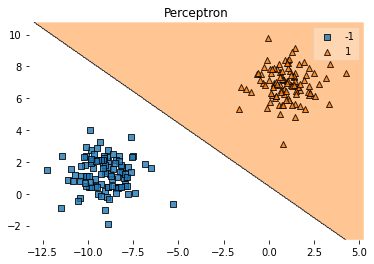

In [ ]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()